# Import Libraries 

In [1]:
import pandas as pd  
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
#Take price in Crore and area in marla
df = pd.read_csv('final data mid (1) (3).csv')
df.head() 

,price in crore,type,location,District,bathroom,bedroom,area,latitude,longitude
0,0.2500,Flat,Bahria Town Karachi,Malir,2,2,4.9,25.021452,67.303431
1,0.9720,Flat,Bahria Town Karachi,Malir,4,4,5.4,25.021452,67.303431
2,0.7420,Flat,Bahria Town Karachi,Malir,3,3,4.2,25.021452,67.303431
3,0.4464,Flat,Bahria Town Karachi,Malir,2,2,2.5,25.021452,67.303431
4,4.1000,House,DHA Defence,South,4,3,4.0,24.798393,67.032767


In [3]:
#get some information about our Data-Set
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23416 entries, 0 to 23415
Data columns (total 9 columns):
price in crore    23416 non-null float64
type              23416 non-null object
location          23416 non-null object
District          23416 non-null object
bathroom          23416 non-null int64
bedroom           23416 non-null int64
area              23416 non-null float64
latitude          23416 non-null float64
longitude         23416 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 1.6+ MB


,price in crore,bathroom,bedroom,area,latitude,longitude
count,23416.000000,23416.000000,23416.000000,23416.000000,23416.000000,23416.000000
mean,3.320906,3.566408,3.471515,9.734945,24.916721,67.105109
std,4.639150,1.634885,1.508195,9.926127,0.106088,0.129236
min,0.000000,1.000000,0.000000,0.600000,24.793524,66.699112
25%,0.850000,2.000000,3.000000,4.800000,24.845554,67.032767
50%,1.550000,3.000000,3.000000,7.300000,24.920419,67.064127
75%,3.750000,4.000000,4.000000,11.500000,24.972871,67.134385
max,95.500000,13.000000,13.000000,320.000000,31.533534,74.336019


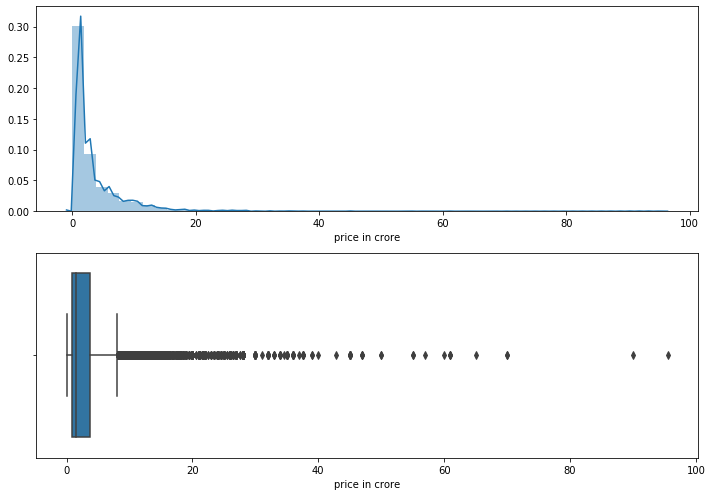

In [4]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price in crore'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price in crore'])
plt.tight_layout()

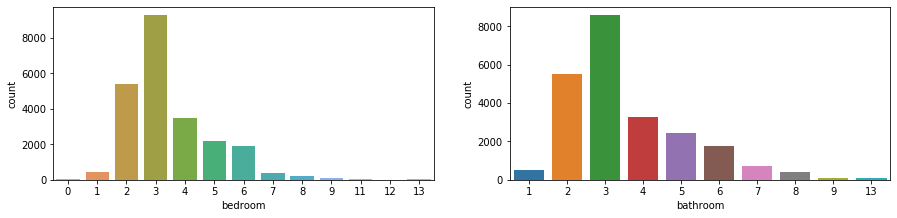

In [5]:
#visualizing bedrooms,bathrooms,floors,grade
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(df['bedroom'])
fig.add_subplot(2,2,2)
sns.countplot(df['bathroom'])

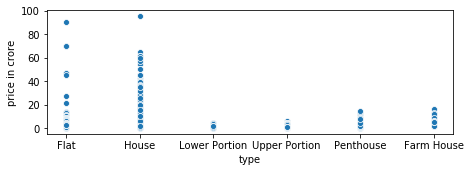

In [6]:
#visualizing square footage of (property_type and price)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(df['type'], df['price in crore'])

# Normal Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
dfle = df
dfle.type =le.fit_transform(dfle.type)

In [9]:
df

,price in crore,type,location,District,bathroom,bedroom,area,latitude,longitude
0,0.2500,1,Bahria Town Karachi,Malir,2,2,4.900000,25.021452,67.303431
1,0.9720,1,Bahria Town Karachi,Malir,4,4,5.400000,25.021452,67.303431
2,0.7420,1,Bahria Town Karachi,Malir,3,3,4.200000,25.021452,67.303431
3,0.4464,1,Bahria Town Karachi,Malir,2,2,2.500000,25.021452,67.303431
4,4.1000,2,DHA Defence,South,4,3,4.000000,24.798393,67.032767
...,...,...,...,...,...,...,...,...,...
23411,1.9900,2,Gadap Town,Malir,3,3,7.933872,25.092281,66.961481
23412,70.0000,1,Federal B Area,Central,3,3,4.958670,24.927473,67.064127
23413,3.8000,1,Cantt,Malir,4,4,10.942132,24.855068,67.049931
23414,3.0600,1,Cantt,Malir,3,3,9.454531,24.855068,67.049931


In [10]:
final = df.drop(['location','District'],axis='columns')
final

,price in crore,type,bathroom,bedroom,area,latitude,longitude
0,0.2500,1,2,2,4.900000,25.021452,67.303431
1,0.9720,1,4,4,5.400000,25.021452,67.303431
2,0.7420,1,3,3,4.200000,25.021452,67.303431
3,0.4464,1,2,2,2.500000,25.021452,67.303431
4,4.1000,2,4,3,4.000000,24.798393,67.032767
...,...,...,...,...,...,...,...
23411,1.9900,2,3,3,7.933872,25.092281,66.961481
23412,70.0000,1,3,3,4.958670,24.927473,67.064127
23413,3.8000,1,4,4,10.942132,24.855068,67.049931
23414,3.0600,1,3,3,9.454531,24.855068,67.049931


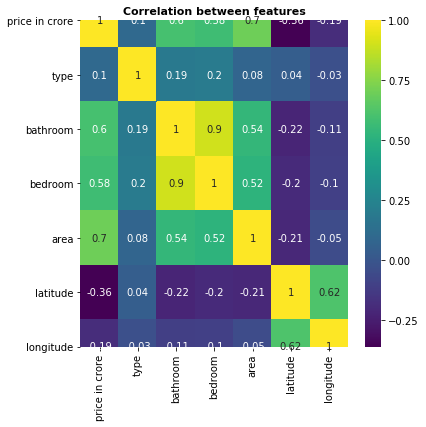

In [11]:
#correlatin
train_corr=final.corr().round(2)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(train_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=11)
plt.show()

# Define X and Y

In [12]:
X = final.iloc[:, 1:].values
Y = final.iloc[:, 0].values
print(X)

[[ 1.         2.         2.         4.9       25.0214515 67.3034311]
 [ 1.         4.         4.         5.4       25.0214515 67.3034311]
 [ 1.         3.         3.         4.2       25.0214515 67.3034311]
 ...
 [ 1.         4.         4.        10.9421318 24.8550676 67.0499315]
 [ 1.         3.         3.         9.4545308 24.8550676 67.0499315]
 [ 1.         3.         3.         9.4545308 24.8550676 67.0499315]]


In [13]:
print(Y)

[0.25  0.972 0.742 ... 3.8   3.06  2.7  ]


# Split the data in traing and test set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [15]:
#standardization scaler - fit&transform on train, fit only on test
#from sklearn.preprocessing import MinMaxScaler
#Scaler = MinMaxScaler()
#Scaler.fit(X_train)
#X_train = Scaler.transform(X_train)
#X_test = Scaler.transform(X_test)

# Train the model on training set

In [16]:
from sklearn.linear_model import LinearRegression
ml_regressor = LinearRegression()
ml_regressor.fit(X_train, Y_train)

LinearRegression()

In [17]:
Y_Pred = ml_regressor.predict(X_train)
Y_Pred

array([ 2.53932088,  9.23147518, -0.07638668, ...,  2.02826393,
        9.57058518,  2.20504675])

In [18]:
from sklearn.metrics import r2_score
r2_score(Y_train,Y_Pred)

0.5867603608224112

In [19]:
import statsmodels.api as sm
ml_regression = sm.OLS(Y_train,X_train)
ml_regression = ml_regression.fit()
ml_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.716
Model:                            OLS   Adj. R-squared (uncentered):              0.716
Method:                 Least Squares   F-statistic:                              7869.
Date:                Fri, 01 Oct 2021   Prob (F-statistic):                        0.00
Time:                        19:31:20   Log-Likelihood:                         -47458.
No. Observations:               18732   AIC:                                  9.493e+04
Df Residuals:                   18726   BIC:                                  9.497e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0868      0.024      3.620      0.000       0.040       0.134
x2             0.7094      0.031     22.544      0.000       0.648       0.771
x3             0.1967      0.034      5.858      0.000       0.131       0.263
x4             0.2202      0.003     82.742      0.000       0.215       0.225
x5            -9.8722      0.283    -34.925      0.000     -10.426      -9.318
x6             3.6330      0.105     34.581      0.000       3.427       3.839
==============================================================================
Omnibus:                    21254.273   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26469813.494
Skew:                           4.969   Prob(JB):                         0.00
Kurtosis:                     186.889   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predict the test result test

In [20]:
Y_pred = ml_regressor.predict(X_test)
Y_pred

array([ 5.00202499,  4.51260535, -0.96420598, ...,  5.77719391,
        3.09215405,  0.86871193])

# Evaluate the model

In [21]:
#evaluate the model (intercept and slope)
print(ml_regressor.intercept_)
print(ml_regressor.coef_)

301.0409914922583
[ 0.06729985  0.66581263  0.20652753  0.22189334 -9.00340017 -1.17364789]


In [22]:
#put results as a DataFrame
coeff_df = pd.DataFrame(ml_regressor.coef_, final.drop('price in crore',axis =1).columns, columns=['Coefficient']) 
coeff_df

,Coefficient
type,0.067300
bathroom,0.665813
bedroom,0.206528
area,0.221893
latitude,-9.003400
longitude,-1.173648


In [23]:
ml_regressor.predict(X_test)

array([ 5.00202499,  4.51260535, -0.96420598, ...,  5.77719391,
        3.09215405,  0.86871193])

In [24]:
from sklearn.metrics import r2_score


In [25]:
r2_score(Y_test,Y_pred)

0.6479026952614417

In [26]:
print(ml_regressor.score(X_train, Y_train))

0.5867603608224112


# Plot the results

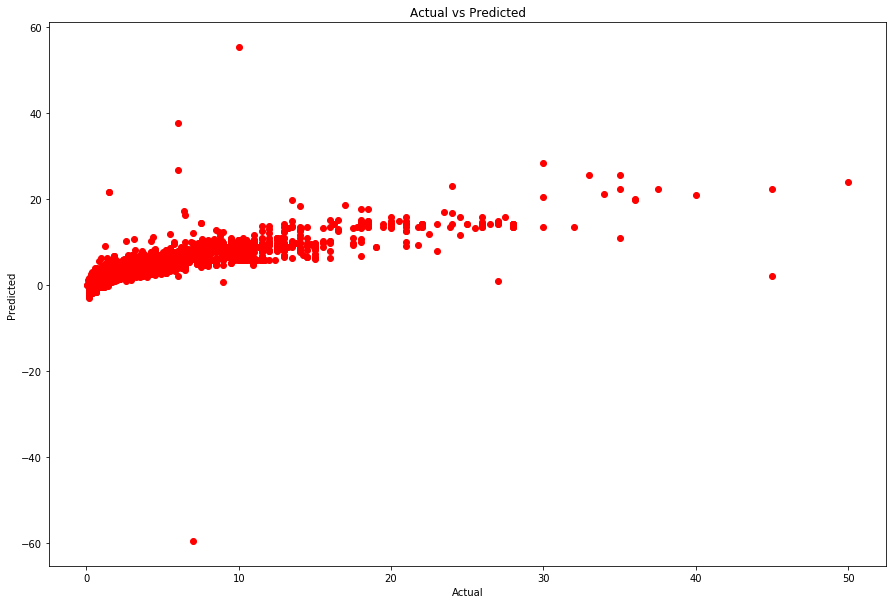

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y_test,Y_pred, color = 'red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Predicted values

In [28]:
pred_y_final = pd.DataFrame({'Atual value':Y_test,'Predicted value':Y_pred,'Difference':Y_test-Y_pred})
pred_y_final

,Atual value,Predicted value,Difference
0,3.60,5.002025,-1.402025
1,6.50,4.512605,1.987395
2,0.26,-0.964206,1.224206
3,1.25,2.892450,-1.642450
4,6.30,6.858537,-0.558537
...,...,...,...
4679,0.70,0.237066,0.462934
4680,0.68,-0.328422,1.008422
4681,10.65,5.777194,4.872806
4682,0.98,3.092154,-2.112154


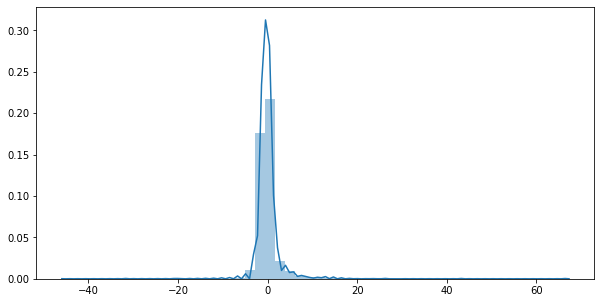

In [29]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (Y_test- Y_pred)
sns.distplot(residuals)

In [30]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MSA:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


MSA: 1.3287988132036639
MSE: 7.209564422459494
RMSE: 2.6850632064179596


In [31]:
print("Mean sq. errror between y_test and predicted =", np.mean(Y_pred-Y_test)**2)

Mean sq. errror between y_test and predicted = 0.001152856212923123
